# Portfolio Project: Biodiversity in National Parks

## 0. Introduction

### Project Objectives

This project focuses on studying biodiversity in different national parks. The main goal of the project is educational: to apply the skills in analyzing and interpreting data that were developed in the lessons of the Data Science Foundations II course. 

The objectives of this project are as follows:

- to explore the structure of data and its specifics

- to analyze the diversity of species represented in the data by counting the number of species and observations in different categories and comparing the distribution with biodiversity at global level (approximate number of species known to science)

- to compare the variety of species and observations in different national parks

- to study the conservation status of different species as well as it's correlation with the number of observations recorded

- and returning to the first point: uncover data anomalies - values and distributions that raise questions and to some extent indicate the artificial nature of the data (that the dataset is not truly reflective of reality and has been created or modified for educational purposes).

### Project Details and Contact

The project materials are two files: 'species_info.csv' and 'observations.csv'.

The paper consists of an introduction, 3 chapters, conclusion and appendix, contains 55 code cells and 9 graphs.

If you have any questions or comments please contact ***d.gordok*** in the Codecademy Forum (https://discuss.codecademy.com/).

## 1. Exploring the Data

First, let's import the modules we'll be working with.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Now we can upload the first data file called 'species_info' and have a first look at what it contains.

In [2]:
species = pd.read_csv('species_info.csv')
species.info()
species.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The datafile contains 4 columns and 5824 rows. Let's explore the 'categories' column.

In [3]:
print('number of categories:', species.category.nunique())
print('categories:', species.category.unique())

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


There are 7 categories available. Please see in appendix some comments on the given classification [1]. Let's take a look at how many unique scientific names we have.

In [4]:
print('number of scientific names:', species.scientific_name.nunique())

number of scientific names: 5541


It's less than the number of rows (5824). The first assumption is that we have duplicated rows. Let's check it out.

In [5]:
print(species[species.duplicated()])

Empty DataFrame
Columns: [category, scientific_name, common_names, conservation_status]
Index: []


Surprisingly, we don't have any duplicates. Let's look at the rows in which the scientific names are repeated.

In [6]:
#print rows for all scientific_names that appear >1 times
print(species[species.duplicated(subset=['scientific_name'])])

            category                   scientific_name  \
3017          Mammal                    Cervus elaphus   
3019          Mammal            Odocoileus virginianus   
3020          Mammal                       Canis lupus   
3022          Mammal                     Puma concolor   
3025          Mammal                  Lutra canadensis   
...              ...                               ...   
5619  Vascular Plant  Panicum rigidulum var. rigidulum   
5638  Vascular Plant                    Setaria pumila   
5640  Vascular Plant                  Vulpia bromoides   
5643  Vascular Plant                     Vulpia myuros   
5750  Vascular Plant                   Rosa eglanteria   

                                           common_names conservation_status  
3017                                 Rocky Mountain Elk                 NaN  
3019               White-Tailed Deer, White-Tailed Deer                 NaN  
3020                                    Gray Wolf, Wolf         In Re

For an example, let's look at the first row from the output above and it's duplication.

In [7]:
print(species[species['scientific_name'] == 'Cervus elaphus'])

     category scientific_name        common_names conservation_status
4      Mammal  Cervus elaphus       Wapiti Or Elk                 NaN
3017   Mammal  Cervus elaphus  Rocky Mountain Elk                 NaN


The rows have very description of common names. We can also check if there are any rows that have all information duplicated except conservation status.

In [8]:
print(species[species.duplicated(subset=['category','scientific_name', 'common_names'])])

     category      scientific_name     common_names conservation_status
3283     Fish  Oncorhynchus mykiss    Rainbow Trout          Threatened
4448   Mammal          Canis lupus  Gray Wolf, Wolf          Endangered


Yes, we have two cases. Let's take a closer look at them.

In [9]:
print(species[species['scientific_name'] == 'Canis lupus'])
print(species[species['scientific_name'] == 'Oncorhynchus mykiss'])

     category scientific_name     common_names conservation_status
8      Mammal     Canis lupus        Gray Wolf          Endangered
3020   Mammal     Canis lupus  Gray Wolf, Wolf         In Recovery
4448   Mammal     Canis lupus  Gray Wolf, Wolf          Endangered
     category      scientific_name   common_names conservation_status
560      Fish  Oncorhynchus mykiss  Rainbow Trout                 NaN
3283     Fish  Oncorhynchus mykiss  Rainbow Trout          Threatened


While the rows for Rainbow Trout could be interpreted as duplication, but only with the addition of conservation status information in the second case, the rows for Gray Wolf raise doubts that we are dealing with duplications: the rows 8 and 4448 indicate an 'Endangered' conservation status,  but in the row 3020 we have 'In recovery'. There are several possible explanations for this:

1. Looking for additional info about this species you can the following: 
- Cervus elaphus across its native range is a highly variable species – hence the taxonomies dividing it into many sub-species (https://www.cabidigitallibrary.org/doi/10.1079/cabicompendium.89943)
- There are 38 subspecies of Canis lupus listed in the taxonomic authority Mammal Species of the World (2005, 3rd edition)(https://en.wikipedia.org/wiki/Subspecies_of_Canis_lupus)

This means that each species can have subspecies. The first hypothesis is that the variable 'subspecies' existed at the time of data collection and this variable is just not present in the dataset we are working with. The appendix includes some comments on the difficulty of defining species [2].

2. There are multiple timeframes when the data was collected. According to the second hypothesis, a variable 'Time' (e.g. Date/Month/Year) is missing in the dataset. In this case, we can't know if the time points of observations are the same for all species or if some of observations were made at different seasons.

3. There are multiple areas, where the data were recorded. According to this hypothesis, a variable 'Area' is missing.

These hypotheses may explain why scientific species names are not always unique in the dataframe and why, in particular, conservation status information differs in the rows for Gray Wolf.

Let's move on to the 'observations' dataframe, which could probably help us to understand the data better.

In [10]:
observations = pd.read_csv('observations.csv')
observations.info()
observations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Here we have 3 columns and 23296 rows. Let's count the number of parks and the number of scientific names.

In [11]:
print(f"number of parks:{observations.park_name.nunique()}")
print('parks:', observations.park_name.unique())

number of parks:4
parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [12]:
print('number of scientific names:', observations.scientific_name.nunique())

number of scientific names: 5541


The number of unique scientific names is the same as in the 'species' dataframe. Let's check if we have duplicated rows:

In [13]:
print('duplicated rows:', observations[observations.duplicated()])

duplicated rows:               scientific_name                            park_name  \
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
8710    Streptopelia decaocto            Yellowstone National Park   
10038          Plantago major  Great Smoky Mountains National Park   
10674           Arctium minus               Yosemite National Park   
12381    Eleocharis palustris  Great Smoky Mountains National Park   
13372     Hesperis matronalis                  Bryce National Park   
16741       Prunella vulgaris  Great Smoky Mountains National Park   
17378    Potentilla norvegica               Yosemite National Park   
17577      Spilogale putorius            Yellowstone National Park   
18141           Poa compressa  Great Smoky Mountains National Park   
19392       Cichorium intybus            Yellowstone National Park   
20294  Botrychium virginianum            Yellowstone National Park   
20820    Monotropa hypopithys  Great Smoky Mountains National Park   
211

Yes, we have! At the first glance, we could assume that if all values for one row are identical to the values for another row - one of the rows is redundant. But again, before making this conclusion, let's take a closer look at the first row of the output and look at all rows with this scientific_name:

In [14]:
print(observations[observations['scientific_name'] == 'Echinochloa crus-galli'])

              scientific_name                            park_name  \
443    Echinochloa crus-galli               Yosemite National Park   
802    Echinochloa crus-galli                  Bryce National Park   
1454   Echinochloa crus-galli  Great Smoky Mountains National Park   
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
11435  Echinochloa crus-galli                  Bryce National Park   
11688  Echinochloa crus-galli            Yellowstone National Park   
17581  Echinochloa crus-galli            Yellowstone National Park   
17639  Echinochloa crus-galli               Yosemite National Park   

       observations  
443             159  
802             112  
1454             62  
7263             62  
11435           116  
11688           254  
17581           235  
17639           172  


Indeed the rows 1454 and 7263 are completely identical, but interesting fact is that the species 'Echinochloa crus-galli' is present twice in each park. Looking ahead, it should be said that this is true not only for 'Echinochloa crus-galli' but for all species in the dataset - each species has the same number of rows in each park: if it's 1 row in one park - there is 1 row in each other park, if 2 rows - then 2 in all other parks etc. (we will analyze this characteristic of the data in detail in the third chapter). Moreover, we can assume that 'species' and 'observations' files share a common source, because number of rows in the species dataframe (5824) * number of parks (4) = number of rows in observations dataframe (23296).

The 'area' hypothesis now looks invalid, as it is difficult to imagine that the study area is divided in exactly the same way for all parks where that species is represented, depending on which species we are dealing with. It is also doubtful that all subspecies are equally represented in different parks: there are no cases where one park has 2 subspecies and another 3. Therefore, it is worth preferring the hypothesis that we are talking about different timeframes when the recording was made. There is a possibility that some species need to be studied in different seasons, as their observability may be different depending on the season (migratory birds, hibernation, spawning, etc.). Data from different periods were probably roughly combined into a common dataset (roughly because common names were not unified), then divided into two separate files 'species' and 'observations', and somewhere in this process information about when observations were made was lost.

In most rows, the data in the 'observations' column is different. As for the completely repeated rows, it's possible that some of subspecies e.g. of Echinochloa crus-galli have been observed the same number of times in the same national park. Based on all of the above, we can neither delete rows nor combine the number of observations in which the combination 'scientific_name' - 'park_name' is repeated. Although some of rows look very similar or can have exactly the same values, each row in the 'observations' dataframe seems to be unique.

We need to emphasize that this hypothesis remains a hypothesis. Under the given circumstances, we can only speculate with varying degrees of plausibility because we lack information on how the data were collected and the reason for the repeated recordings for some species. The purpose of this project is primarily educational - in this sense, in order to move forward and start practicing different ways of processing and analyzing data, we will take the hypothesis of different timeframes as our starting point - a kind of axiom. This means that the conclusions we draw from our analysis should not be taken as a 100% valid description of biodiverity in national parks.

Following the hypothesis of different timeframes, we have to take into account that in the repeated rows for one species-park combination many entities can be counted twice. Thus, we need to convert the data into the form that there is only one row for each 'scientific_name'-'park_name' combination. For cases of multiple rows, we will take the average value of observastions, thus bringing the observations to a single value. Of course, we are simplifying the data to some extent, but this simplification is necessary to move forward.

In [15]:
#transform data into max. 1 row per species-park combination
observations_unique = observations.groupby(['scientific_name', 'park_name']).mean().round(0).astype('int').reset_index()

#print an example for Gray Wolf
print(observations_unique[observations_unique['scientific_name'] == 'Canis lupus'])

     scientific_name                            park_name  observations
3216     Canis lupus                  Bryce National Park            43
3217     Canis lupus  Great Smoky Mountains National Park            20
3218     Canis lupus            Yellowstone National Park           110
3219     Canis lupus               Yosemite National Park            65


For the main part of the analysis we will combine the dataframes 'species' and 'observations': we will use the merged file to explore the number of observations per category and the distribution of conservation statuses per category. But there is a small problem: as noted before, common names were recorded differently for the same scientific names in the 'species' file. Since this information does not play an important role in this project, we will remove 'common_names' column and leave only one row for each species in the 'species' dataframe.

In [16]:
#remove common_names
species_unique = species.drop('common_names', axis=1)

#remove duplicates
species_unique.drop_duplicates(inplace=True)

print(len(species_unique))

5543


The lenghth of the new dataframe is not equal to unique number of scientific names (5541). The explanation is simple: we should not forget that we have 2 species in the 'species' dataframe where all information is duplicated except conservation status (please see outputs 8 and 9). This is how we handle it: for Rainbow Trout we will keep the conservation status 'Threatened' because it's better than a missing value. For Gray Wolf we will keep the status 'Endangered' because this status is present in 2 out of 3 cases, and it's better to overestimate the risk of extinction than to underestimate it.

In [17]:
species_unique = species_unique.drop(index=560)
species_unique = species_unique.drop(index=3020)
print(species_unique[species_unique['scientific_name'] == 'Canis lupus'])
print(species_unique[species_unique['scientific_name'] == 'Oncorhynchus mykiss'])

  category scientific_name conservation_status
8   Mammal     Canis lupus          Endangered
     category      scientific_name conservation_status
3283     Fish  Oncorhynchus mykiss          Threatened


In [18]:
print(len(species_unique))

5541


Now when the two dataframes are prepared, we can merge them.

In [19]:
#merge the dataframes
biodiversity = pd.merge(observations_unique, species_unique, on='scientific_name', how='left')

#print an example for Gray Wolf
print(biodiversity[biodiversity['scientific_name'] == 'Canis lupus'])

     scientific_name                            park_name  observations  \
3216     Canis lupus                  Bryce National Park            43   
3217     Canis lupus  Great Smoky Mountains National Park            20   
3218     Canis lupus            Yellowstone National Park           110   
3219     Canis lupus               Yosemite National Park            65   

     category conservation_status  
3216   Mammal          Endangered  
3217   Mammal          Endangered  
3218   Mammal          Endangered  
3219   Mammal          Endangered  


In [20]:
biodiversity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22164 entries, 0 to 22163
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      22164 non-null  object
 1   park_name            22164 non-null  object
 2   observations         22164 non-null  int64 
 3   category             22164 non-null  object
 4   conservation_status  716 non-null    object
dtypes: int64(1), object(4)
memory usage: 865.9+ KB


The 'biodiversity' file is almost finalized. One cosmetic change: let's remove the words 'National Park' from all values in the 'park_name' column, as they seem a bit redundant.

In [21]:
#remove "National Park" and strip
biodiversity.park_name = biodiversity['park_name'].replace('National Park', '', regex=True)
biodiversity.park_name = biodiversity['park_name'].str.strip()

#print an example for Gray Wolf
print(biodiversity[biodiversity['scientific_name'] == 'Canis lupus'])

     scientific_name              park_name  observations category  \
3216     Canis lupus                  Bryce            43   Mammal   
3217     Canis lupus  Great Smoky Mountains            20   Mammal   
3218     Canis lupus            Yellowstone           110   Mammal   
3219     Canis lupus               Yosemite            65   Mammal   

     conservation_status  
3216          Endangered  
3217          Endangered  
3218          Endangered  
3219          Endangered  


Lastly, it's worth checking if we have any missing values (except for conservation_status) to make sure we haven't missed anything.

In [22]:
#check for nan in all columns
biodiversity.isna().sum()

scientific_name            0
park_name                  0
observations               0
category                   0
conservation_status    21448
dtype: int64

Everything is correct. We're ready to begin analyzing the data.

## 2. Analysis

As we found out in the first chapter, the total number of unique scientific names equals 5541. We begin the analysis by counting the number species in each category.

In [23]:
species_per_category = species_unique.groupby(['category'])['scientific_name'].count().reset_index()
species_per_category = species_per_category.rename(columns={'scientific_name':'species'})

#sort in descending order
species_per_category = species_per_category.sort_values(by=['species'], ascending=False, ignore_index=True)

#add percentages
total_count = species_per_category['species'].sum()
species_per_category['percentage'] = species_per_category['species'] / total_count * 100

print(species_per_category)

            category  species  percentage
0     Vascular Plant     4262   76.917524
1               Bird      488    8.807075
2  Nonvascular Plant      333    6.009746
3             Mammal      176    3.176322
4               Fish      125    2.255910
5          Amphibian       79    1.425735
6            Reptile       78    1.407688


To have a better picture of the results, let's visualize this distribution in the form of a horizontal bar chart.

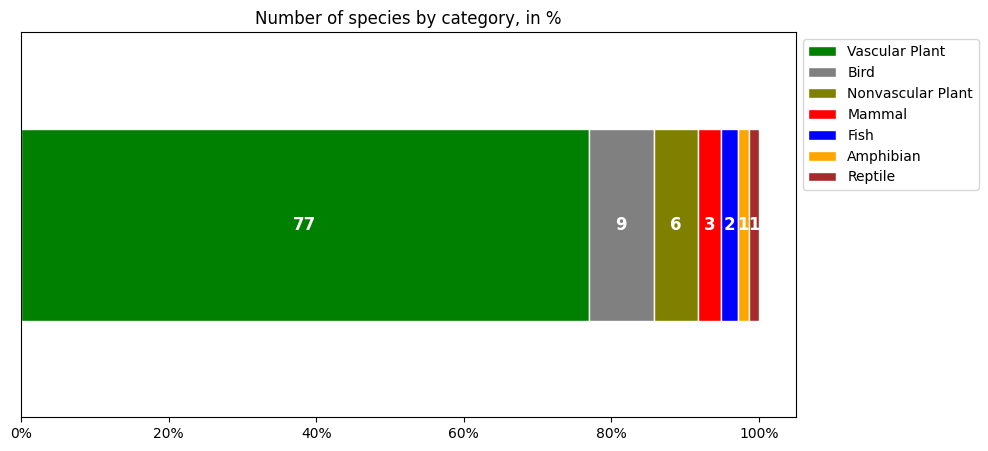

In [24]:
#define colors for the graph
colors = {'Amphibian':'orange',
          'Bird': 'gray',
          'Fish': 'blue',
          'Mammal': 'red',
          'Nonvascular Plant': 'olive',
          'Reptile': 'brown',
          'Vascular Plant': 'green'}

#the position of the bar on the y-axis
r = [1]

barHeight = 0.1

left_value = 0

plt.figure(figsize=(10,5))
for index, row in species_per_category.iterrows():
    category = row['category']
    percentage = row['percentage']
    color = colors[category]
    plt.barh(r, percentage, left=left_value, color=color, edgecolor='white', label=category, height=barHeight)
    plt.text(left_value + percentage / 2, r[0], f'{percentage:.0f}', va='center', ha='center', color='white', fontweight='bold', fontsize=12)
    left_value += percentage
    
plt.yticks([])
plt.ylim(0.9, 1.1)
plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.title('Number of species by category, in %')
 
plt.show()

As we can see, 'Vascular Plants' is the most represented category in our data. Together with the categories 'Birds' and 'Non-vascular plants' they cover ca. 92 % of all species. Category 'Mammals' is on the fourth place, 'Fishes', 'Amphibians' and 'Reptiles' are at the end of the bar.

Let's compare these findings with the distribution of species in these categories of the biodiversity of our planet - all species known to science. Below are the numbers of species known to science (excluding extinct / possibly extinct/ extinct in the wild species) and the sources where this information was found:
- Amphibian: 8717 (https://amphibiaweb.org/)
- Bird: 11038 (https://www.birdlife.org/)
- Fish: 35608 (https://www.fishbase.us/search.php)
- Mammal: 6623 (https://www.mammaldiversity.org/)
- Nonvascular Plant (liverworts, hornworts, mosses): 19498 (https://wfoplantlist.org/)
- Vascular Plant (lycopods, flowering plants, ferns, conifers and allies, ginkgo, cycadophyta): 358076 (https://wfoplantlist.org/)
- Reptile: 12119 (http://www.reptile-database.org/, https://en.wikipedia.org/wiki/List_of_recently_extinct_reptiles)

Please note, these numbers are not absolutely accurate and up to date, but they can nevertheless be used as a benchmark.

Let's store this information in a dataframe.

In [25]:
data_species_global = [['Vascular Plant', 358076], ['Fish', 35608], ['Nonvascular Plant', 19498], ['Reptile', 12119], ['Bird', 11038], ['Amphibian', 8717], ['Mammal', 6623]]

species_per_category_global = pd.DataFrame(data_species_global, columns = ['category', 'species'])

#add percentages
total_species_global = species_per_category_global['species'].sum()
species_per_category_global['percentage'] = species_per_category_global['species'] / total_species_global * 100

print(species_per_category_global)

            category  species  percentage
0     Vascular Plant   358076   79.276654
1               Fish    35608    7.883475
2  Nonvascular Plant    19498    4.316782
3            Reptile    12119    2.683100
4               Bird    11038    2.443771
5          Amphibian     8717    1.929910
6             Mammal     6623    1.466307


Now we sort both dataframes by category to compare them on the graph.

In [26]:
species_per_category_global = species_per_category_global.sort_values(by=['category'], ignore_index=True)
species_per_category = species_per_category.sort_values(by=['category'], ignore_index=True)

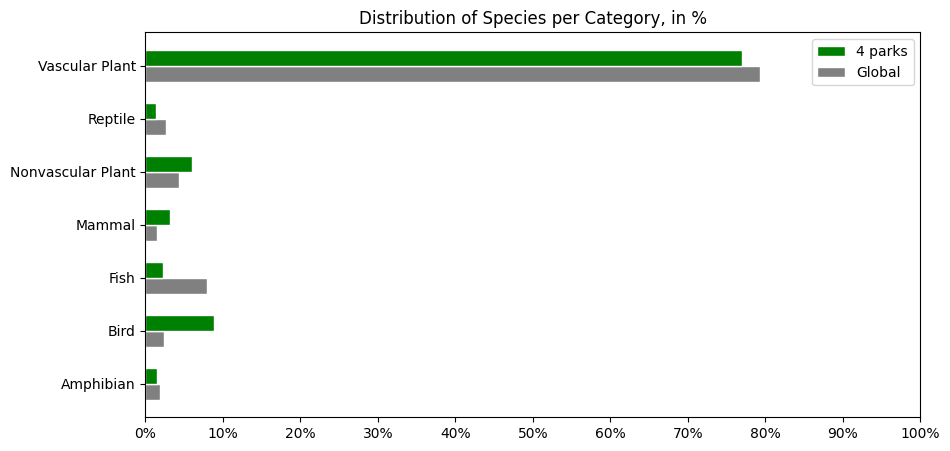

In [27]:
#bar positions
barHeight = 0.3
r = np.arange(len(species_per_category_global['percentage']))
r2 = r + barHeight

fig, ax = plt.subplots(figsize=(10,5))
ax.barh(r, species_per_category_global['percentage'], color='gray', height=barHeight, edgecolor='white', label='Global')
ax.barh(r2, species_per_category['percentage'], color='green', height=barHeight, edgecolor='white', label='4 parks')

ax.set_yticks(r + barHeight/2)
ax.set_yticklabels(species_per_category_global['category'])
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])

ax.legend(loc='best', bbox_to_anchor=(1,1), reverse=True)
plt.title('Distribution of Species per Category, in %')

plt.show()

We can conclude that the distributions are comparable: vascular plants make up the major part of the world's species diversity (>75%), and the share of each of the other categories does not exceed 10%. What is worth noting is that we have a higher proportion of birds and a lower proportion of fishes. Let's calculate how much of the world's biological richness our data cover (in percentages for each category) and display the results in the graph.

In [28]:
species_per_category['share of global biodiversity'] = species_per_category['species'] / species_per_category_global['species'] * 100
print(species_per_category)

            category  species  percentage  share of global biodiversity
0          Amphibian       79    1.425735                      0.906275
1               Bird      488    8.807075                      4.421091
2               Fish      125    2.255910                      0.351045
3             Mammal      176    3.176322                      2.657406
4  Nonvascular Plant      333    6.009746                      1.707867
5            Reptile       78    1.407688                      0.643617
6     Vascular Plant     4262   76.917524                      1.190250


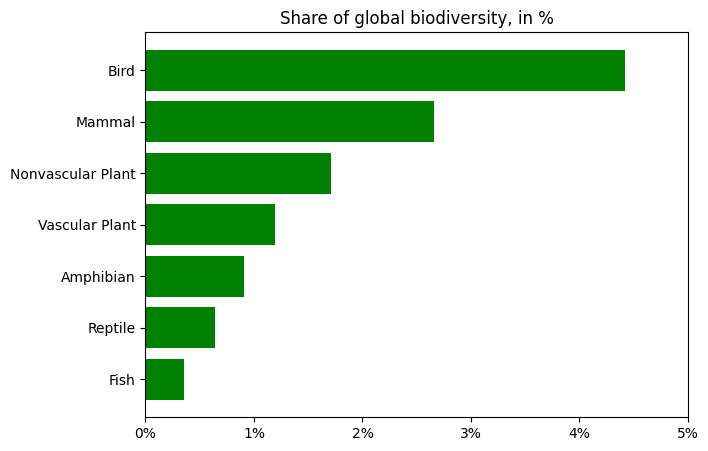

In [29]:
species_per_category = species_per_category.sort_values(by=['share of global biodiversity'])
plt.figure(figsize=(7,5))
plt.barh(y=species_per_category['category'], width=species_per_category['share of global biodiversity'], color='green')
plt.xticks([0, 1, 2, 3, 4, 5], ['0%', '1%', '2%', '3%', '4%', '5%'])
plt.title('Share of global biodiversity, in %')
plt.show()

As we see, our data covers less than 5% of species for each category. This seems plausible given the fact that all national parks we are analyzing are in North America, and other continents and parts of the world are not available for the analysis. It also explains why the 'Fish' category is the least represented - the richness of the aquatic world of the oceans and seas is not included in the data.

Let's move on to the next topic: number of observations of species (maximum, minimum and average). Before we begin, please note that there are some difficulties in counting and comparing the number of observations, which are described in the appendix [3]. First, we need to summarize the observations in all the parks for each species.

In [30]:
biodiversity_total_obs = biodiversity.groupby(['category', 'scientific_name'])['observations'].sum().reset_index()
print(biodiversity_total_obs)

            category                     scientific_name  observations
0          Amphibian           Acris crepitans crepitans           531
1          Amphibian                 Ambystoma maculatum           539
2          Amphibian   Ambystoma mavortium melanostictum           607
3          Amphibian                    Ambystoma opacum           661
4          Amphibian                Ambystoma talpoideum           546
...              ...                                 ...           ...
5536  Vascular Plant  Zigadenus venenosus var. gramineus           535
5537  Vascular Plant  Zigadenus venenosus var. venenosus           509
5538  Vascular Plant                        Zizia aptera           570
5539  Vascular Plant                         Zizia aurea           628
5540  Vascular Plant                    Zizia trifoliata           540

[5541 rows x 3 columns]


Now we can calculate the min, max and mean values per each category.

In [31]:
# Get the index of the rows with the maximum observations per category
idx_max = biodiversity_total_obs.groupby('category')['observations'].idxmax()

max_per_category = biodiversity_total_obs.loc[idx_max].sort_values(by=['observations'], ascending=False, ignore_index=True)
print(max_per_category)

            category         scientific_name  observations
0               Bird       Branta hutchinsii           735
1     Vascular Plant  Lycopodium tristachyum           729
2             Mammal             Bison bison           700
3  Nonvascular Plant            Ulota crispa           679
4          Amphibian          Rana palustris           677
5               Fish        Notropis baileyi           670
6            Reptile  Chrysemys picta bellii           669


In [32]:
# Get the index of the rows with the minimum observations per category
idx_min = biodiversity_total_obs.groupby('category')['observations'].idxmin()

min_per_category = biodiversity_total_obs.loc[idx_min].sort_values(by=['observations'], ascending=True, ignore_index=True)
print(min_per_category)

            category            scientific_name  observations
0               Bird             Grus americana           131
1             Mammal                Canis rufus           137
2               Fish            Noturus baileyi           143
3          Amphibian               Rana sierrae           144
4     Vascular Plant              Geum radiatum           162
5            Reptile  Aspidoscelis tigris munda           456
6  Nonvascular Plant    Brachythecium oxycladon           472


In [33]:
list_avg_total_obs = []

for category in biodiversity_total_obs['category'].unique():
    dataframe = biodiversity_total_obs[biodiversity_total_obs['category'] == category]
    mode_value = dataframe['observations'].mode().iloc[0] if not dataframe['observations'].mode().empty else None
    mean_value = dataframe['observations'].mean()
    std_value = dataframe['observations'].std()
    list_avg_total_obs.append([category, mode_value, mean_value, std_value])

avg_observations_total = pd.DataFrame(list_avg_total_obs, columns=['category', 'mode', 'mean', 'std'])
avg_observations_total = avg_observations_total.round({'mean': 1, 'std': 3})

print(avg_observations_total)

            category  mode   mean     std
0          Amphibian   546  549.6  77.105
1               Bird   551  561.9  61.282
2               Fish   585  558.2  88.045
3             Mammal   568  545.1  87.800
4  Nonvascular Plant   551  572.5  38.113
5            Reptile   534  565.5  47.351
6     Vascular Plant   555  571.6  40.732


Interestingly, the mean and modal values for each category fall in the range of 530 - 575 observations. It is worth looking at the distribution of observations within each category - let's plot a series of histograms.

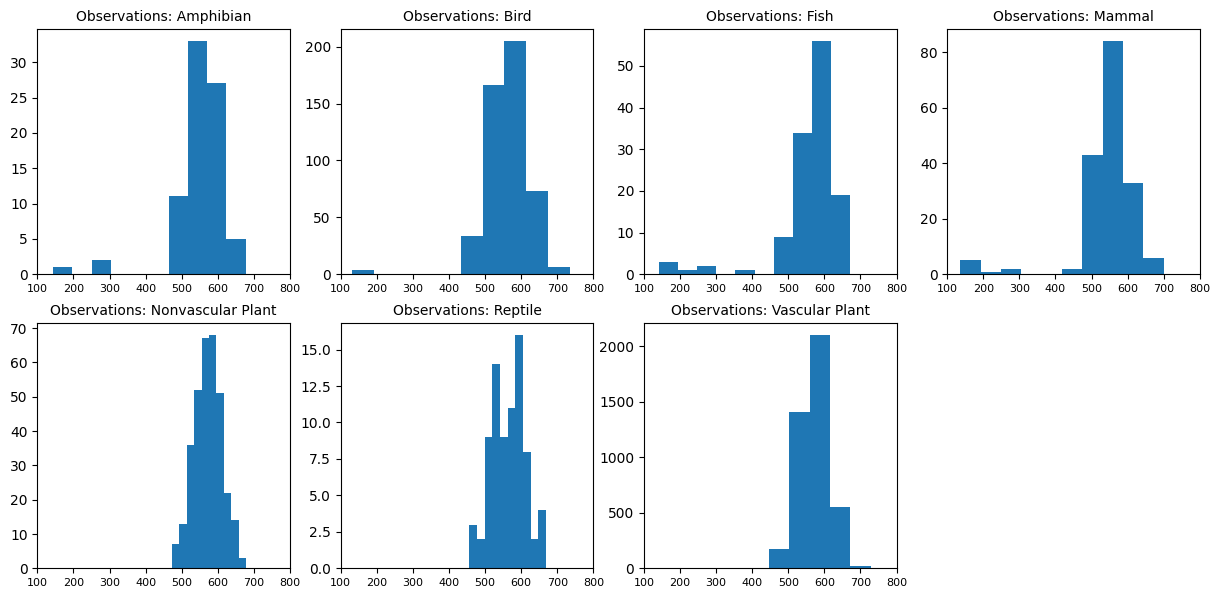

In [34]:
plt.figure(figsize=(15,7))
subplot_index=1
for category in biodiversity_total_obs['category'].unique():
    dataframe=biodiversity_total_obs[biodiversity_total_obs['category'] == category]
    ax = plt.subplot(2,4,subplot_index)
    ax.hist(dataframe['observations'])
    plt.xticks([100, 200, 300, 400, 500, 600, 700, 800], fontsize=8)
    plt.title(f'Observations: {category}', fontsize=10)
    subplot_index +=1
plt.show()

Although the number of observations for each category is different (y-axis), the distributions of frequencies on the x-axis are quite similar. This seems rather suspicious, to be honest, but perhaps this is normal given the nature of data collection in national parks. For now, we will not draw any conclusions about that.

We will continue our analysis by comparing the national parks to each other. First, we can calculate the total number of observations per park and display the results in a donut chart.

In [35]:
observations_per_park = biodiversity.groupby('park_name')['observations'].sum().reset_index()
observations_per_park = observations_per_park.sort_values(by=['observations'], ascending=False, ignore_index=True)
print(observations_per_park)

               park_name  observations
0            Yellowstone       1373598
1               Yosemite        821529
2                  Bryce        548231
3  Great Smoky Mountains        410888


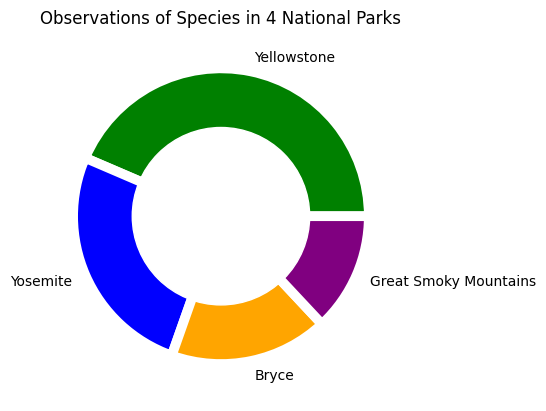

In [36]:
names_list = observations_per_park['park_name']
observations_list = observations_per_park['observations']

#create a circle at the center of the plot
circle = plt.Circle( (0,0), 0.6, color='white')

plt.pie(observations_list, labels=names_list, colors=['green','blue', 'orange', 'purple'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Observations of Species in 4 National Parks')

plt.show()

Yellowstone is the "richest" national park in biological terms according to our data (\~1.4 million observations), Yosemite is in the second place (\~820 000 observations), followed by Bryce (\~550 000) and Great Smoky Mountains (\~410 000).

We already know which species are the most common and which are the rarest if we consider all 4 parks together. Let's take a look at the maximum and minimum values within a single park.

In [37]:
data_max = []

for category in biodiversity['category'].unique():
    dataframe=biodiversity[biodiversity['category'] == category]
    max_index = dataframe['observations'].idxmax()
    max_row = dataframe.loc[max_index]
    data_max.append([category, max_row['scientific_name'], max_row['park_name'], max_row['observations']])

max_observations = pd.DataFrame(data_max, columns = ['category', 'scientific_name', 'park_name', 'observations'])

print(max_observations)

            category          scientific_name    park_name  observations
0     Vascular Plant   Lycopodium tristachyum  Yellowstone           321
1  Nonvascular Plant  Pogonatum brachyphyllum  Yellowstone           307
2               Bird         Spinus lawrencei  Yellowstone           305
3          Amphibian         Ambystoma opacum  Yellowstone           301
4            Reptile   Chrysemys picta bellii  Yellowstone           307
5             Mammal        Lasiurus borealis  Yellowstone           296
6               Fish   Etheostoma sanguifluum  Yellowstone           300


In [38]:
#example for the text below
print(biodiversity_total_obs[biodiversity_total_obs['scientific_name']=='Spinus lawrencei'])

    category   scientific_name  observations
488     Bird  Spinus lawrencei           691


The park with the most observations overall has the most observations in each category - that makes sense. But comparing with the table of maximum values in total (please see output 31) we see that for some categories 'species-winners' are identical and for some are different. For example, the most common bird in our data for the 4 parks together is 'Branta hutchinsii' (735 observations), but in Yellowstone Park in particular the most common bird is 'Spinus lawrencei' (305 observations) and in the 4 parks together there are 691 observations of this species. This indicates an unequal distribution of observations of species between the parks, which is also plausible.

Let's take a look at the minimum number of observations within a single park.

In [39]:
data_min = []

for category in biodiversity['category'].unique():
    dataframe=biodiversity[biodiversity['category'] == category]
    min_index = dataframe['observations'].idxmin()
    min_row = dataframe.loc[min_index]
    data_min.append([category, min_row['scientific_name'], min_row['park_name'], min_row['observations']])

min_observations = pd.DataFrame(data_min, columns = ['category', 'scientific_name', 'park_name', 'observations'])

print(min_observations)

            category                    scientific_name  \
0     Vascular Plant                    Corydalis aurea   
1  Nonvascular Plant              Racomitrium aciculare   
2               Bird                 Strix occidentalis   
3          Amphibian                       Rana sierrae   
4            Reptile  Sceloporus undulatus hyacinthinus   
5             Mammal                        Canis rufus   
6               Fish                  Erimonax monachus   

               park_name  observations  
0                  Bryce             9  
1  Great Smoky Mountains            19  
2  Great Smoky Mountains            11  
3  Great Smoky Mountains            11  
4  Great Smoky Mountains            18  
5  Great Smoky Mountains            13  
6  Great Smoky Mountains            18  


Here the conclusion about the uneven distribution of species is confirmed once again. Moreover, although Great Smoky Mountains is the smallest park in terms of observations, the minimum number of observations for vascular plant within one park is observed in Bryce park: Corydalis aurea - only 9 observations.

Let's move on to the next topic: conservation status of different species. First, we need to create a dataframe with all data in which the 'conservation_status' column does not have a missing value.

In [40]:
biodiversity_conservation = biodiversity[biodiversity['conservation_status'].isna() == False].reset_index()
print(len(biodiversity_conservation))

716


There are 716 rows available for the analysis. Let's take a look at the conservation statuses that we have.

In [41]:
print('Conservation statuses:', biodiversity_conservation['conservation_status'].unique())

Conservation statuses: ['Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


We can conclude that we have information about conservation status only for species that are or have been threatened to some extent. This is how we will order these statuses based on the danger/risk of extinction of species:
1. In Recovery (least danger, recovering but still monitored)
2. Species of Concern
3. Threatened
4. Endangered (most danger, high risk of extinction)

Let's count how many species there are for each conservation status. 

In [42]:
conservation_species = biodiversity_conservation.groupby('conservation_status')['scientific_name'].count().reset_index()
conservation_species = conservation_species.rename(columns={'scientific_name':'species'})
print(conservation_species)

  conservation_status  species
0          Endangered       60
1         In Recovery       12
2  Species of Concern      604
3          Threatened       40


The most frequent status is 'Species of Concern', the least frequent status is 'In Recovery'. Please note that these numbers do not necessarily reflect unique species - the same species may occur up to 4 times in the list, as we have 4 national parks in the data (at this point we assume that a species may have different statuses in different parks - we will explore this in detail in the next chapter).

Let's take a look at the numbers for each status per category and display the results as a grouped bar chart.

In [43]:
conservation_species_per_category = biodiversity_conservation.groupby(['conservation_status', 'category'])['scientific_name'].count().reset_index()
conservation_species_per_category = conservation_species_per_category.rename(columns={'scientific_name':'species'})

#add null values so that there are no missing values in the table
missing_rows = []

for status in conservation_species_per_category['conservation_status'].unique():
    for category in biodiversity['category'].unique():
        if not ((conservation_species_per_category['conservation_status'] == status) & (conservation_species_per_category['category'] == category)).any():
            missing_rows.append({'conservation_status': status, 'category': category, 'species': 0})

missing_df = pd.DataFrame(missing_rows)
conservation_species_per_category = pd.concat([conservation_species_per_category, missing_df], ignore_index=True)

conservation_species_per_category = conservation_species_per_category.sort_values(by=['conservation_status', 'category'], ignore_index=True)
print(conservation_species_per_category)

   conservation_status           category  species
0           Endangered          Amphibian        4
1           Endangered               Bird       16
2           Endangered               Fish       12
3           Endangered             Mammal       24
4           Endangered  Nonvascular Plant        0
5           Endangered            Reptile        0
6           Endangered     Vascular Plant        4
7          In Recovery          Amphibian        0
8          In Recovery               Bird       12
9          In Recovery               Fish        0
10         In Recovery             Mammal        0
11         In Recovery  Nonvascular Plant        0
12         In Recovery            Reptile        0
13         In Recovery     Vascular Plant        0
14  Species of Concern          Amphibian       16
15  Species of Concern               Bird      272
16  Species of Concern               Fish       16
17  Species of Concern             Mammal       88
18  Species of Concern  Nonvasc

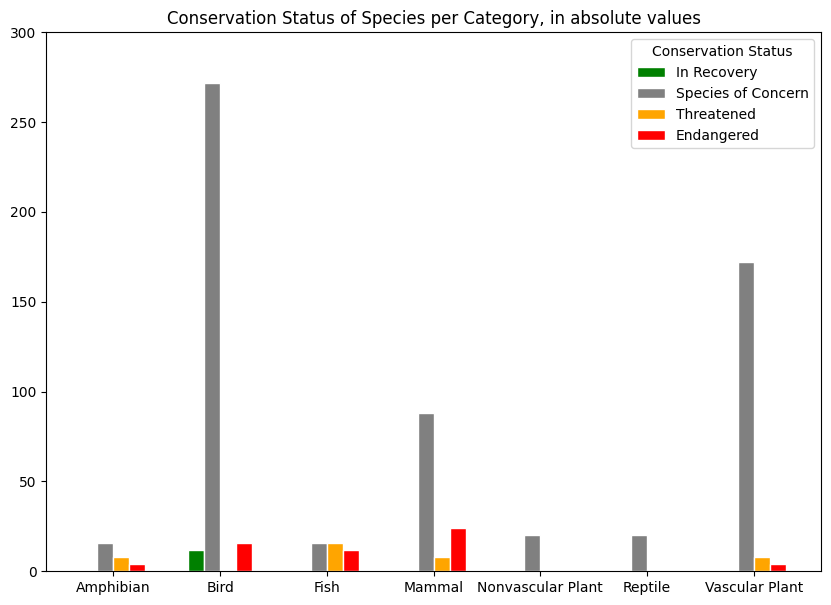

In [44]:
#define parameters for the graph
barWidth = 0.15
r = np.arange(7)  # Positions for the first set of bars
r2 = r + barWidth  # Positions for the second set of bars
r3 = r2 + barWidth  # Positions for the third set of bars
r4 = r3 + barWidth  # Positions for the fourth set of bars

fig, ax = plt.subplots(figsize=(10, 7))

ax.bar(r, conservation_species_per_category[conservation_species_per_category['conservation_status'] == 'In Recovery']['species'], color='green', width=barWidth, edgecolor='white', label='In Recovery')
ax.bar(r2, conservation_species_per_category[conservation_species_per_category['conservation_status'] == 'Species of Concern']['species'], color='gray', width=barWidth, edgecolor='white', label='Species of Concern')
ax.bar(r3, conservation_species_per_category[conservation_species_per_category['conservation_status'] == 'Threatened']['species'], color='orange', width=barWidth, edgecolor='white', label='Threatened')
ax.bar(r4, conservation_species_per_category[conservation_species_per_category['conservation_status'] == 'Endangered']['species'], color='red', width=barWidth, edgecolor='white', label='Endangered')

ax.set_xticks(r + 1.5 * barWidth)
ax.set_xticklabels(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant'])
ax.set_yticks(np.arange(0, 301, 50))

ax.set_title('Conservation Status of Species per Category, in absolute values')
ax.legend(loc='best', bbox_to_anchor=(1, 1), title='Conservation Status')

plt.show()

It is interesting that only birds have a status of “In Recovery”. At the same time, we see that the predominant part of the statuses of species in almost all categories is “Species of Concern”. 

It's also interesting to check, if there is a correlation between the conservation status and number of observations recorded for each species. We will not calculate the regression index, but just look at the relationship between the two variables on the graph. To eliminate the factor of different distribution of species across the parks, let's first calculate the the mean value of observations per scientific name and then plot the results.

[Text(39.347222222222214, 0.5, '')]

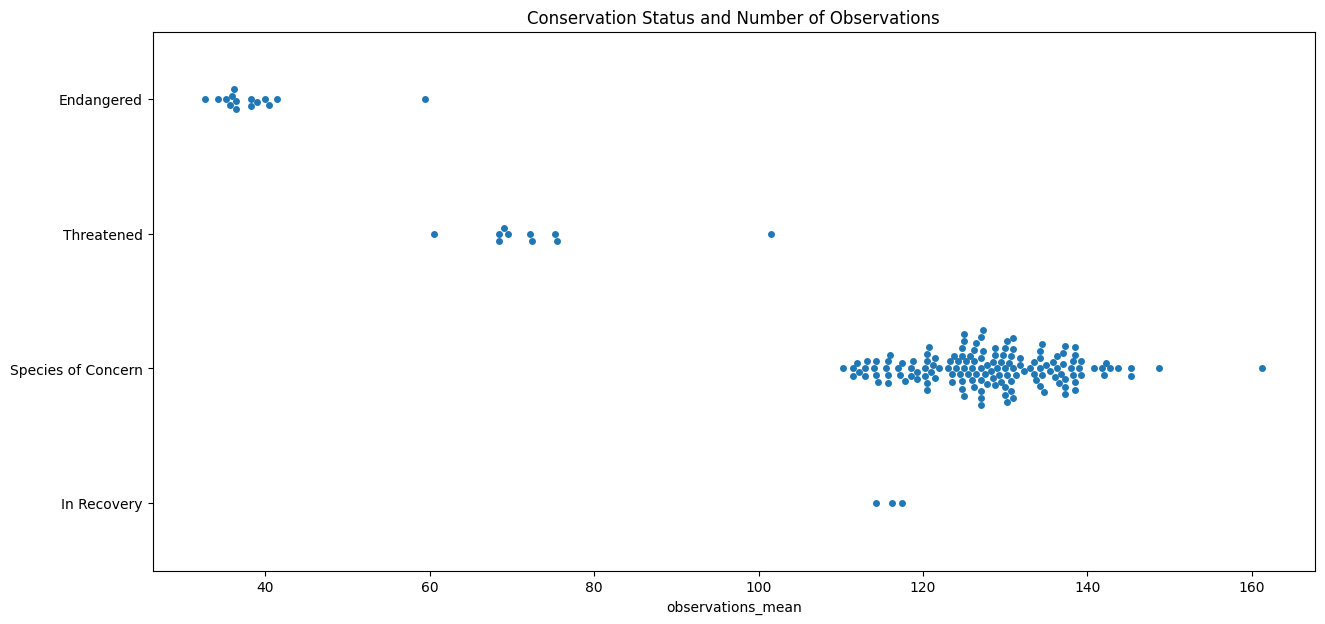

In [45]:
conservation_observations_per_species = biodiversity_conservation.groupby(['conservation_status', 'category', 'scientific_name'])['observations'].mean().reset_index()
conservation_observations_per_species = conservation_observations_per_species.rename(columns={'observations':'observations_mean'})
conservation_observations_per_species = conservation_observations_per_species.sort_values(by=['observations_mean', 'conservation_status'], ignore_index=True)

plt.figure(figsize=(15,7))
ax = sns.swarmplot(data=conservation_observations_per_species, x="observations_mean", y="conservation_status")
ax.set_title('Conservation Status and Number of Observations')
ax.set(ylabel="")

As the chart shows, extinction risk is directly related to the number of observations: species with the fewest observations (~35-45) have an “Endangered” status, species with ~60-100 observations have a “Threatened” status, and species with ~110-160 observations are defined as “Species of Concern”. Species 'In Recovery' are no longer threatened, but still need to be monitored as they are in the same range as “Species of Concern”. 

## 3. Exploring Strange Aspects of Data

Besides the plausible results presented above, the project also revealed some “anomalies” - illogical and unrealistic findings. 

First, let's check how many species have more than one row in each park in the initial dataframe.

In [46]:
counts = observations.groupby(['scientific_name', 'park_name']).size().reset_index(name='count')
print('1 row per species-park combination:', counts[counts['count'] == 1]['scientific_name'].count())
print('2 rows or more per species-park combination:', counts[counts['count'] > 1]['scientific_name'].count())
print('3 rows or more per species-park combination:', counts[counts['count'] > 2]['scientific_name'].count())
print('4 rows or more per species-park combination:', counts[counts['count'] > 3]['scientific_name'].count())
print('completely duplicated rows:', observations[observations.duplicated()]['scientific_name'].count())

1 row per species-park combination: 21068
2 rows or more per species-park combination: 1096
3 rows or more per species-park combination: 36
4 rows or more per species-park combination: 0
completely duplicated rows: 15


We tried to explain these duplications (2 rows or more) through the hypothesis of different time points when the observations were made. But we should also consider the quite strange fact that each species has the same number of rows in each park it's found in, and going further - all species are present in all parks.

In [47]:
#group by 'scientific_name' and 'park_name' and count the occurrences
counts = observations.groupby(['scientific_name', 'park_name']).size().reset_index(name='count')

#check if each species has the same number of rows in each park
consistent_species = counts.groupby('scientific_name')['count'].nunique()

#species with inconsistent counts across parks
inconsistent_species = consistent_species[consistent_species > 1]

if inconsistent_species.empty:
    print("Each species has the same number of rows in each park it's found in.")
else:
    print("There are species with different number of rows in different parks.")
    print(inconsistent_species)

Each species has the same number of rows in each park it's found in.


In [48]:
total_parks = observations['park_name'].nunique()

#group by 'scientific_name' and count the unique parks where each species is observed
species_parks = observations.groupby('scientific_name')['park_name'].nunique().reset_index(name='park_count')

#check if each species is present in all parks
species_not_in_all_parks = species_parks[species_parks['park_count'] < total_parks]

if species_not_in_all_parks.empty:
    print("All species are present in all parks.")
else:
    print("Some species are not present in all parks.")
    print(species_not_in_all_parks)

All species are present in all parks.


In [49]:
species_per_category_park = biodiversity.groupby(['park_name', 'category'])['scientific_name'].count().reset_index(name='species')
species_per_category_park = species_per_category_park.sort_values(by=['park_name', 'species'], ascending=False, ignore_index=True)
print(species_per_category_park)

                park_name           category  species
0                Yosemite     Vascular Plant     4262
1                Yosemite               Bird      488
2                Yosemite  Nonvascular Plant      333
3                Yosemite             Mammal      176
4                Yosemite               Fish      125
5                Yosemite          Amphibian       79
6                Yosemite            Reptile       78
7             Yellowstone     Vascular Plant     4262
8             Yellowstone               Bird      488
9             Yellowstone  Nonvascular Plant      333
10            Yellowstone             Mammal      176
11            Yellowstone               Fish      125
12            Yellowstone          Amphibian       79
13            Yellowstone            Reptile       78
14  Great Smoky Mountains     Vascular Plant     4262
15  Great Smoky Mountains               Bird      488
16  Great Smoky Mountains  Nonvascular Plant      333
17  Great Smoky Mountains   

Even if we explain the same number of rows for species in each park by a specifics of making observations for some species in different time periods/seasons, it is difficult to find a realistic explanation why there are no unique species that are present only in one park. There should be a difference between the parks in the diversity of species.

The oddities are not only in the presence of species in all parks, but also in the ratio of species to observations. Let us repeat what we did at the beginning of Chapter 2, but this time for observations instead of species.

In [50]:
observations_per_category = biodiversity.groupby(['category'])['observations'].sum().reset_index()

#sort in descending order
observations_per_category = observations_per_category.sort_values(by=['observations'], ascending=False, ignore_index=True)

#add percentages
total_observations = observations_per_category['observations'].sum()
observations_per_category['percentage'] = observations_per_category['observations'] / total_observations * 100

print(observations_per_category)

            category  observations  percentage
0     Vascular Plant       2436144   77.233799
1               Bird        274205    8.693203
2  Nonvascular Plant        190653    6.044329
3             Mammal         95941    3.041646
4               Fish         69775    2.212098
5            Reptile         44107    1.398337
6          Amphibian         43421    1.376589


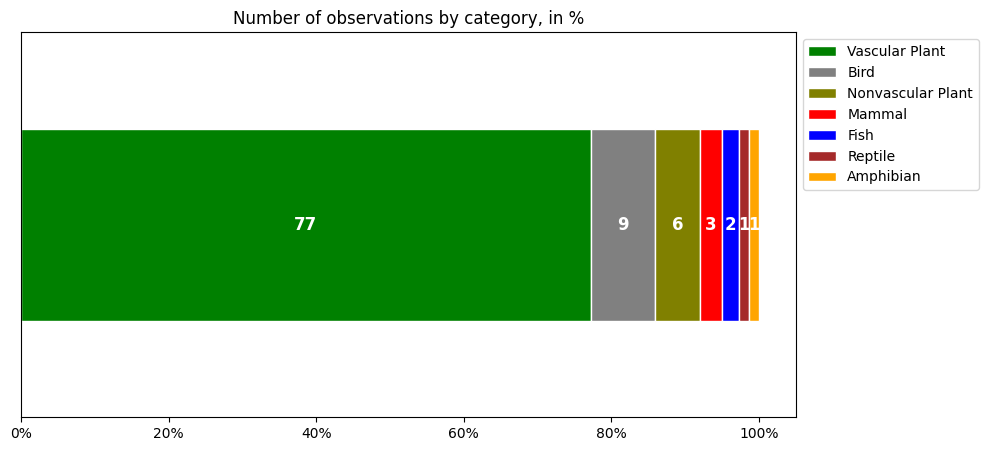

In [51]:
#the position of the bar on the y-axis
r = [1]

barHeight = 0.1

left_value = 0

plt.figure(figsize=(10,5))
for index, row in observations_per_category.iterrows():
    category = row['category']
    percentage = row['percentage']
    color = colors[category]
    plt.barh(r, percentage, left=left_value, color=color, edgecolor='white', label=category, height=barHeight)
    plt.text(left_value + percentage / 2, r[0], f'{percentage:.0f}', va='center', ha='center', color='white', fontweight='bold', fontsize=12)
    left_value += percentage
    
plt.yticks([])
plt.ylim(0.9, 1.1)
plt.xticks([0, 20, 40, 60, 80, 100], ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.title('Number of observations by category, in %')
 
plt.show()

Rounding to integer values, this graph becomes identical to the graph at the beginning of Chapter 2. If the values are almost identical, then the ratio of the number of species to the number of their observations is approximately the same among all categories. Let's calculate the ratio.

In [52]:
species_observations_per_category = pd.merge(species_per_category[['category', 'species']], observations_per_category[['category', 'observations']], on='category')
species_observations_per_category['ratio'] = species_observations_per_category['observations'] / species_observations_per_category['species']
species_observations_per_category = species_observations_per_category.sort_values(by=['ratio'], ascending=False, ignore_index=True)
print(species_observations_per_category)

            category  species  observations       ratio
0  Nonvascular Plant      333        190653  572.531532
1     Vascular Plant     4262       2436144  571.596434
2            Reptile       78         44107  565.474359
3               Bird      488        274205  561.895492
4               Fish      125         69775  558.200000
5          Amphibian       79         43421  549.632911
6             Mammal      176         95941  545.119318


Indeed, the ratio is similar in all categories: around 550-572 observations per species in each category (in all 4 parks together). In fact, these numbers are the same as the mean values of observations per category we calculated before (please see output 33). As noted earlier, this similarity of figures as well as the similarity of distributions (output 34) doesn't seem plausible.

When we look at the proportions of observations per category in each park, the data again seem unrealistic.

In [53]:
observations_per_category_park = biodiversity.groupby(['park_name', 'category'])['observations'].sum().reset_index()
observations_per_category_park = observations_per_category_park.sort_values(by=['park_name', 'category'])

#calculate the total observations per park
total_observations_park = observations_per_category_park.groupby('park_name')['observations'].sum()

#map the total observations to each row and calculate the percentage
observations_per_category_park['percentage'] = (
    observations_per_category_park['observations'] / 
    observations_per_category_park['park_name'].map(total_observations_park) * 100)

print(observations_per_category_park)

                park_name           category  observations  percentage
0                   Bryce          Amphibian          7299    1.331373
1                   Bryce               Bird         48387    8.826024
2                   Bryce               Fish         12223    2.229535
3                   Bryce             Mammal         16831    3.070056
4                   Bryce  Nonvascular Plant         32992    6.017901
5                   Bryce            Reptile          7855    1.432790
6                   Bryce     Vascular Plant        422644   77.092321
7   Great Smoky Mountains          Amphibian          5622    1.368256
8   Great Smoky Mountains               Bird         35295    8.589932
9   Great Smoky Mountains               Fish          9068    2.206927
10  Great Smoky Mountains             Mammal         12309    2.995707
11  Great Smoky Mountains  Nonvascular Plant         24857    6.049580
12  Great Smoky Mountains            Reptile          5616    1.366796
13  Gr

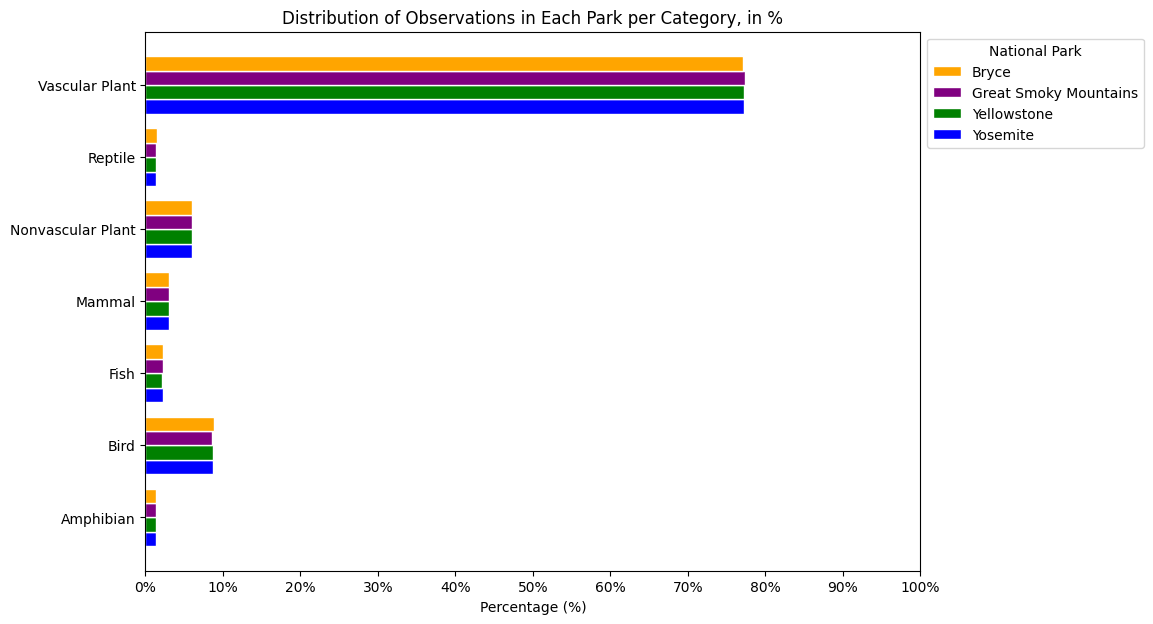

In [54]:
#define parameters
barHeight = 0.2
r = np.arange(7)  # Positions for the first set of bars
r2 = r + barHeight  # Positions for the second set of bars
r3 = r2 + barHeight  # Positions for the third set of bars
r4 = r3 + barHeight  # Positions for the fourth set of bars

fig, ax = plt.subplots(figsize=(10, 7))

ax.barh(r, observations_per_category_park[observations_per_category_park['park_name'] == 'Yosemite']['percentage'], color='blue', height=barHeight, edgecolor='white', label='Yosemite')
ax.barh(r2, observations_per_category_park[observations_per_category_park['park_name'] == 'Yellowstone']['percentage'], color='green', height=barHeight, edgecolor='white', label='Yellowstone')
ax.barh(r3, observations_per_category_park[observations_per_category_park['park_name'] == 'Great Smoky Mountains']['percentage'], color='purple', height=barHeight, edgecolor='white', label='Great Smoky Mountains')
ax.barh(r4, observations_per_category_park[observations_per_category_park['park_name'] == 'Bryce']['percentage'], color='orange', height=barHeight, edgecolor='white', label='Bryce')

ax.set_yticks(r + 1.5 * barHeight)
ax.set_yticklabels(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant'])
ax.set_xticks(np.arange(0, 101, 10))
ax.set_xticklabels([f'{i}%' for i in range(0, 101, 10)])
ax.set_xlabel('Percentage (%)')

ax.set_title('Distribution of Observations in Each Park per Category, in %')
ax.legend(loc='best', bbox_to_anchor=(1, 1), title='National Park', reverse=True)

plt.show()

As we have found, each species occurs in each park. Moreover, we also see that the conservation status of each species is the same in all parks, because otherwise the numbers in the table below would vary within each status.

In [55]:
conservation_species_per_park = biodiversity_conservation.groupby(['conservation_status', 'park_name'])['scientific_name'].count().reset_index()
conservation_species_per_park = conservation_species_per_park.rename(columns={'scientific_name':'species'})
print(conservation_species_per_park)

   conservation_status              park_name  species
0           Endangered                  Bryce       15
1           Endangered  Great Smoky Mountains       15
2           Endangered            Yellowstone       15
3           Endangered               Yosemite       15
4          In Recovery                  Bryce        3
5          In Recovery  Great Smoky Mountains        3
6          In Recovery            Yellowstone        3
7          In Recovery               Yosemite        3
8   Species of Concern                  Bryce      151
9   Species of Concern  Great Smoky Mountains      151
10  Species of Concern            Yellowstone      151
11  Species of Concern               Yosemite      151
12          Threatened                  Bryce       10
13          Threatened  Great Smoky Mountains       10
14          Threatened            Yellowstone       10
15          Threatened               Yosemite       10


The identical values for each park can be explained by the fact that that conservation status is not park-specific (more info about the conservation status see in appendix [4]). In any case, there are enough anomalies in the data without this.

## 4. Conclusion

In this work we investigated biodiversity in 4 national parks and completed all our objectives:

- We explored the structure of data and its specifics. We looked at the structure of the two datasets: a file called 'species' with 4 columns and 5824 rows contains information about the different species, which categories they belong to, what scientific names and common names they have, and their conservation status; and another file called 'observations' with 3 columns and 23296 rows contains information about the number of different scientific names observed in the four national parks (Bryce, Great Smoky Mountains, Yellowstone and Yosemite). We found that some scientfic names have more than 1 row in the 'species' dataframe which we tried to explain with a hypothesis of absence of a 'time' variable. With that being said we reorganized the data and merged them into one dataframe called biodiversity.

- We analyzed the biodiversity represented in the data by counting the number of species and observations in different categories and comparing the distribution with biodiversity information at global level (approximate number of species known to science). We found that the distributions are very similar: vascular plants make up the major part of the world's species diversity (>75%), and the share of each of the other categories is below 10%. Nevertheless, our data cover less than 5% of species known to science for each category (birds are the most represented at 4.4% and fish the least at 0.4%).

- We compared the variety of observations in four national parks. Among the total number of observations, Yellowstone is the biggest park in our data (\~1.4 million observations), this national park has also the most observations in each category (~300). The minimum number of observations of species per category in a single park was recorded in Bryce (9 observations of a vascular plant species) and Great Smoky Mountains (species in other categories with 11-19 observations).

- We analyzed the conservation status of different species as well as it's correlation with the number of observations recorded. The most popular status is 'species of concern', there is relatively small number of species with statuses 'Threatened' or 'Endangered' and only one category (birds) has status 'in recovery'. The relationship between the number of observations and conservation status was demonstrated in the graph.

- We found several “anomalies” in the data. The first oddity was that all species are present in all parks and that each species has the same number of rows compared between the parks. Moreover, the ratio of species to observations is nearly identical across all 6 categories, and the shares of observations for each category are nearly identical for all four parks. And lastly, probably not an anomaly but still worth mentioning: if we have a conservation status for a species in the data, this conservation status is always the same for each park. These "anomalies" may indicate the artificial nature of data. In other words, the data is fictitious and created for educational purposes only, and we just found inconsistencies in this educational material.

It is also worth mentioning that common names of species were left out of the scope of this study. This could be a good objective for a future research project.

## 5. Appendix

The following points illustrate the limitations of studying biodiversity based on the data provided and raise some methodological questions that go beyond the scope of the current project. 

[1] The provided typology is not clear. The term 'category' doesn't rely on a common system of biological classification (taxonomy) which consists of species, genus, family, order, class, phylum, kingdom, and domain (more information here: https://en.wikipedia.org/wiki/Taxonomic_rank). The given typology seems also to be incomplete, since some categories that we could expect to study in the national parks are unfortunately not present in data: e.g. Fungi and Insects.

[2] The term 'species' doesn't have only one definition. The difficulty is that species may contain many individuals of different appearance (“variations”), which raises the question of how to distinguish between one species and another. There are many approaches to defining species: morphological, recognition-based, genetic, evolutionary, etc., which leads to different typologies and therefore to different numbers of known species and different numbers of subspecies. More information about species concepts: https://en.wikipedia.org/wiki/Species.

[3] There are many ways of counting observations, especially for plants, because different plant species and even different individuals of the same species can have varying morphologies, making it difficult to apply a single counting method universally. For this reason, comparing the numbers of  observations of different species involves a process of abstraction: we are simply comparing quantities that may have different “weights” in specific dimensions, e.g., several shrubs may fit within a couple of meters, while one grass-like plant may cover several hectares. This means that it is not possible to get a full picture of biodiversity simply by looking at frequencies of observations. There are a lot of scientific works about the difficulty of doing observations in biology and ecology, e.g.: 
- Elphick, Chris S. "How you count counts: the importance of methods research in applied ecology." Journal of Applied Ecology 45.5 (2008): 1313-1320.
- Walker, K. J., et al. "Making plants count." British Wildlife 26.4 (2015): 243-250.

[4] The provided typology of conservation statuses is also not clear. International Union for Conservation of Nature (IUCN) provides a different typology, where e.g. the term 'threatened' is a grouping of three categories: 'critically endangered', 'endangered', and 'vulnerable'. There are also different levels of studying conservation statuses (multi-country, national or regional) and unfortunately we do not have information about the level in the data provided. More information about conservation statuses: https://en.wikipedia.org/wiki/Conservation_status

***d.gordok.***      **October 2024**